<h1 align=center><font size = 5>Visualisasi Persebaran Panas dan Fluks Panas pada Permukaan Plat Tipis</font></h1>
<h2 align=center><font size = 4>Kelompok 3</font></h2>
<h3 align=center><font size = 3>Huzaifi Hafizhahullah (1306619019)</font></h3>
<h3 align=center><font size = 3>Daffa Aji Pangestu (1306619063)</font></h3>
<h3 align=center><font size = 3>Muhammad Galuh Wicaksono (1306619053)</font></h3>

# Problem

Telah kita kita ketahui bersama bahwa persamaan panas adalah persamaan diferensial parsial parabolic $$\frac{\partial T}{\partial t}=\alpha \nabla^2 T \tag{1} $$ <br>
dengan $$\alpha = \frac{\kappa}{C \rho} \tag{2}$$ <br>
di mana $\kappa$ adalah konduktivitas termal, $C$ adalah panas spesifik dari suatu material, dan $\rho$ adalah densitas. <br>
<br>
Pada proyek kali ini, akan dibuat sebuah visualisasi dari persebaran panas pada plat tipis dengan kondisi batas keempat sisinya tetap.
<img src="kapsel1.jpg">
Oleh karena itu, persamaan (1) perlu diubah ke dalam bentuk untuk penyelesaian dengan koordinat cartesian dua dimensi. Persamaan (1) menjadi $$\frac{\partial T}{\partial t}-\alpha \left ( \frac{\partial ^{2}T}{\partial x^2} +\frac{\partial ^{2}T}{\partial y^2}\right) = 0 \tag{3}$$ <br>

In [1]:
# Import Library yang akan digunakan
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

Menginisiasi sebuah matriks yang merepresentasikan sebuah plat tipis dengan ukuran 50x50

In [2]:
ukuran_plat = 50
max_iter = 1000 # inisiasi iterasi maksimal persebaran panas

In [3]:
# Inisiasi matriks representasi plat tipis
T = np.empty((max_iter, ukuran_plat, ukuran_plat))

Pada kasus ini, nilai $\alpha$ dimisalkan dengan bilangan bulat (Seharusnya disesuaikan dengan konduktivitas termal, panas spesifik, dan densitas dari suatu material sesuai dengan persamaan (2) )

In [4]:
alpha = 2
# alpha = 4

# Metode Penyelesaian

Kondisi awal pada plat adalah titik tengah dengan suhu $0 ^{\circ} C$. Kasus ini menggunakan finite-difference solution dengan persamaan laplace, kemudian mengaplikasikan metode central difference sebagai solusi numerik, maka

$$\frac{\partial T}{\partial t} = \frac{T_{x,j+1}-T_{x,j}}{\Delta t} \tag{4}$$

$$ \frac{\partial ^{2}T}{\partial x^{2}}=\frac{T_{i+1,j}-2T_{i,j}+T_{i-1,j}}{\Delta x^{2}} \tag{5}$$

$$\frac{\partial ^{2}T}{\partial y ^{2}}=\frac{T_{_{i,j+1}}-2T_{i,j}+T_{i,j-1}}{\Delta y ^{2}} \tag{6}$$
<br>
(Chapra, 2006: 853)

Persamaan (4), (5), dan (6) disubstitusi ke persamaan (3) menjadi
$$\frac{T_{i,j+1}-T_{i,j}}{\Delta t}-\alpha\left ( \frac{T_{i+1,j}-2T_{i,j}+T_{i-1,j}}{\Delta x^{2}}+ \frac{T_{i,j+1}-2T_{i,j}+T_{i,j-1}}{\Delta y^{2}}\right ) = 0 \tag{7}$$

Karena plat berbentuk persegi dan selisih antara sumbu $x$ dan $y$ sama, maka $\Delta x$ = $\Delta y$. Persamaan (7) menjadi

$$\frac{T_{i,j+1}-T_{i,j}}{\Delta t}-
\alpha \left ( \frac{
T_{i+1,j}+
T_{i-1,j}+
T_{i,j+1}+
T_{i,j-1}-
4T_{i,j}}{\Delta x^{2}}\right) = 0
\tag{8}$$

Persamaan (8) diubah bentuk supaya $T$ dapat diperlakukan <i>stepped forward</i> dalam $t$ menggunakan <i>stepped forward factor</i> $\eta$ $$\eta = \alpha \frac{\Delta t}{\Delta x^{2}} \tag{9}$$

Dengan menggunakan teori <i>von Neumann Stability</i> $$\alpha \frac{\Delta t} {\Delta x^{2}} < \frac{1}{2} \tag{10} $$
<br>
(Landau, 2015: 481)
<br>yang mana mampu menghasilkan pendekatan yang baik dalam menyelesaikan PDE pada persamaan panas, untuk proyek ini $\Delta t$ didefinisikan sebagai $$\Delta t = \frac{\Delta x^{2}}{4 \alpha} \tag{11}$$

maka persamaan (8) menjadi

$$T_{i,j+1} = T_{i,j}+ \eta \left ( T_{i+1,j}+ T_{i-1,j}+T_{i,j+1}+u_{i,j-1}-4T_{i,j} \right ) \tag{12}$$


# Eksperimen

In [5]:
# Implementasi menggunakan python
delta_x = 1
delta_t = (delta_x ** 2)/(4 * alpha) # persamaan (11)
eta = (alpha * delta_t) / (delta_x ** 2)  # persamaan (9)

Persamaan (12) diimplementasikan menggunakan bahasa python akan menjadi:

In [6]:
def solusi_PDE(T):
    for k in range(0, max_iter-1, 1):
        for i in range(1, ukuran_plat-1, delta_x):
            for j in range(1, ukuran_plat-1, delta_x):
                T[k + 1, i, j] = T[k][i][j] + eta * (T[k][i+1][j] + T[k][i-1][j] + T[k][i][j+1] + T[k][i][j-1] - 4*T[k][i][j])
    return T

In [7]:
# kondisi awal titik tengah plat
T_awal_tengah = 0
T.fill(T_awal_tengah)

In [8]:
# Inisiasi keempat batas sisi plat
batasan = {'T_atas' : 100.0,
           'T_bawah' : 50.0,
           'T_kiri' : 70.0,
           'T_kanan' : 0.0}

T[:, (ukuran_plat-1):, :] = batasan['T_atas']
T[:, :, :1] = batasan['T_kiri']
T[:, :1, 1:] = batasan['T_bawah']
T[:, :, (ukuran_plat-1):] = batasan['T_kanan']

In [9]:
def visualisasi(T_k, k):
    plt.clf()
    plt.title(f"Suhu saat t = {k*delta_t:.3f} satuan waktu")
    plt.xlabel("x")
    plt.ylabel("y")

    # plotting T saat time-step k
    plt.pcolormesh(T_k, cmap=plt.cm.rainbow, vmin=0, vmax=max(list(batasan.values())))
    plt.colorbar().set_label('Temperatur', rotation=270)

    return plt
T = solusi_PDE(T)

def animasi(k):
    visualisasi(T[k], k)

<IPython.core.display.Javascript object>


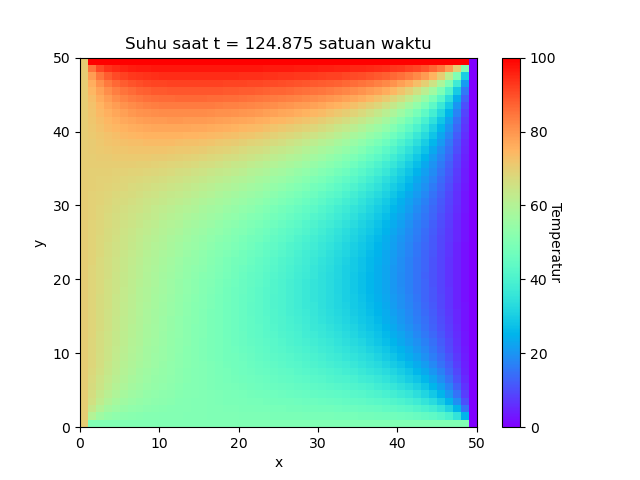

MovieWriter ffmpeg unavailable; using Pillow instead.


In [10]:
anim = animation.FuncAnimation(plt.figure(), animasi, interval=1, frames=max_iter, repeat=False)
anim.save("visualisasi_alpha_2.gif")

Proyek kali ini menginisiasi kondisi awal pada sisi plat dengan suhu:
- sisi atas = $100^{\circ}$
- sisi bawah = $50^{\circ}$
- sisi kanan = $0^{\circ}$
- sisi kiri = $70^{\circ}$
- tengah = $0^{\circ}$

<center><img src="v4.gif">
<caption><center>Persebaran Panas dengan $\alpha = 4$</center></caption>
<center><img src="v2.gif">
<caption><center>Persebaran Panas dengan $\alpha = 2$</center></caption>

# Analisis

Keempat sisi plat diinisasi dengan suhu yang berbeda dengan asumsi suhu pada ujung sisinya tidak berubah. Kita telah mengetahui bahwa secara alamiah panas atau kalor akan mengalir dari daerah bersuhu tinggi ke daerah bersuhu rendah. Maka kita dapat melihat pada visualisasi persebaran panas mengalir dari suhu yang tinggi ke suhu rendah ditandai dengan perubahan warnanya. 
Saat sudah mencapai $\pm$ 124 satuan waktu, bagian tengah plat memiliki suhu yang didominasi pada rentang $40^{\circ} < T < 60^{\circ}$
<br>
Dalam simulasi ini terdapat besaran penting yang berpengaruh cepat rambat flux panas yakni, besaran alpha yang mereprensetasikan rasio antara konduktivitas termal dengan densitas dan panas spesifik dari suatu material akan membuat perembatan panas semakin cepat apabila nilainya besar.
<br>
Proses perambatan termal pada plat terlihat pergerakan perambatan panas lebih cepat ketika panas masih terfokus pada sisi plat dibandingkan saat sudah menyebar menjauhi sisi plat. Hal ini dikarenakan nilai suhu di setiap titik plat mengalami perubahan rentang suhu antara sisi plat dengan titik di mana panas itu menyebar semakin kecil. Hal tersebut membuat hasil penjumlahan termal di setiap titik (lihat persamaan (12)) tidak memberikan kontribusi yang besar/signifikan untuk mengubah cepat rambatnya flux termal.

**<center>Referensi** <br>
Chapra, S. C., & Canale, R. P. (2006). Numerical methods for engineers. Boston: McGraw-Hill Higher Education.<br>
Landau, R. H., Paez, M. M. J., & Bordeianu, C. C. (2015). Computational physics: Problem solving with Python. Wiley-VCH